In [2]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'day 13'))
	print(os.getcwd())
except:
	pass

In [3]:
from computerrefractored import Computer
import matplotlib.pyplot as plt
import utils
from collections import Counter
import numpy as np
%load_ext autoreload
%autoreload 2

In [4]:
noun, verb = 0,0
f=open('input.txt').read()
memory = tuple(int(i) for i in f.split(',')) # let's make it immutable as a tuple
memsize = 100000
memory = tuple(list(memory)+[0]*memsize)
c = Computer(list(memory),noun,verb,[1])

ins = []
while c.running:
    ins.append(c.run())
s = {(x,y):z for x,y,z in zip(ins[:-1:3],ins[1:-1:3],ins[2:-1:3])}
print('solution puzzle 1,',len([(k) for k,v in s.items() if v == 2])) # result day 1
print(Counter(s.values())) # how many of each type of object
print(utils.dimensions(list(s.keys()))) # explore the dimensions of the grid

opcode 99 computer finished
solution puzzle 1, 247
Counter({0: 486, 2: 247, 1: 79, 4: 1, 3: 1})
Dim(min=[0, 0], max=[36, 21], ranges=[37, 22])


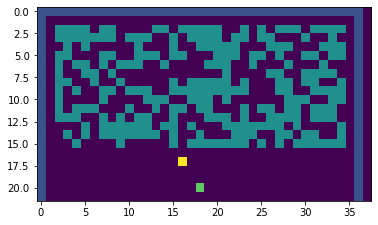

In [5]:
pic = np.zeros(38*22).reshape(38,22)
for k,v in s.items():
    pic[(k)]=v
plt.imshow(pic.T, interpolation='nearest')

In [8]:
noun, verb = 0,0
f=open('input.txt').read()
memory = tuple(int(i) for i in f.split(',')) # let's make it immutable as a tuple
memsize = 10000
memory = tuple(list(memory)+[0]*memsize)
c = Computer(list(memory),noun,verb,[1])

s= {}
score = 0
c.code[0]=2
balpos = 0
patchpos = 0
steering = 0

while c.running:
    if balpos > patchpos: steering = 1
    elif balpos < patchpos: steering = -1
    else: steering =0 
    c.receiveinput(steering) #steer to patch to be under the ball
    x = c.run()
    y = c.run()
    z = c.run()
    if x==-1 and y==0: 
        score = z
    elif x == 'ending execution':
        break
    else: s[(x,y)]=z # save object at location
    if z ==4:
        balpos = x # update x coordinate of ball
    if z == 3:
        patchpos = x # update x coordinate of patch
    #print(f'x {x}, y {y}, z {z}, block{len([(k) for k,v in s.items() if v == 2])}')    

print('final score',score)

opcode 99 computer finished
final score 12954


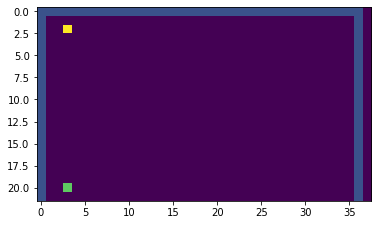

In [9]:
pic = np.zeros(38*22).reshape(38,22)
for k,v in s.items():
    pic[(k)]=v
plt.imshow(pic.T, interpolation='nearest')